In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob

In [5]:
!ls ../output_parameter/230119_PGE*

../output_parameter/230119_PGE_Net_RawRGB_trainon_alpha_0.01_beta_0.0002_teston_alpha_0.01_beta_0.0002_20sampling20images_alpha_sigma_estimated_gaussian.txt
../output_parameter/230119_PGE_Net_RawRGB_trainon_alpha_0.01_beta_0.02_teston_alpha_0.01_beta_0.02_20sampling20images_alpha_sigma_estimated_gaussian.txt
../output_parameter/230119_PGE_Net_RawRGB_trainon_alpha_0.05_beta_0.02_teston_alpha_0.05_beta_0.02_20sampling20images_alpha_sigma_estimated_gaussian.txt
../output_parameter/230119_PGE_Net_RawRGB_trainon_random_noise_teston_alpha_0.01_beta_0.0002_20sampling20images_alpha_sigma_estimated_gaussian.txt
../output_parameter/230119_PGE_Net_RawRGB_trainon_random_noise_teston_alpha_0.01_beta_0.02_20sampling20images_alpha_sigma_estimated_gaussian.txt
../output_parameter/230119_PGE_Net_RawRGB_trainon_random_noise_teston_alpha_0.05_beta_0.02_20sampling20images_alpha_sigma_estimated_gaussian.txt


## Same image, different sampling

../output_parameter/230119_PGE_Net_RawRGB_trainon_alpha_0.01_beta_0.0002_teston_alpha_0.01_beta_0.0002_20sampling20images_alpha_sigma_estimated_gaussian.txt
400


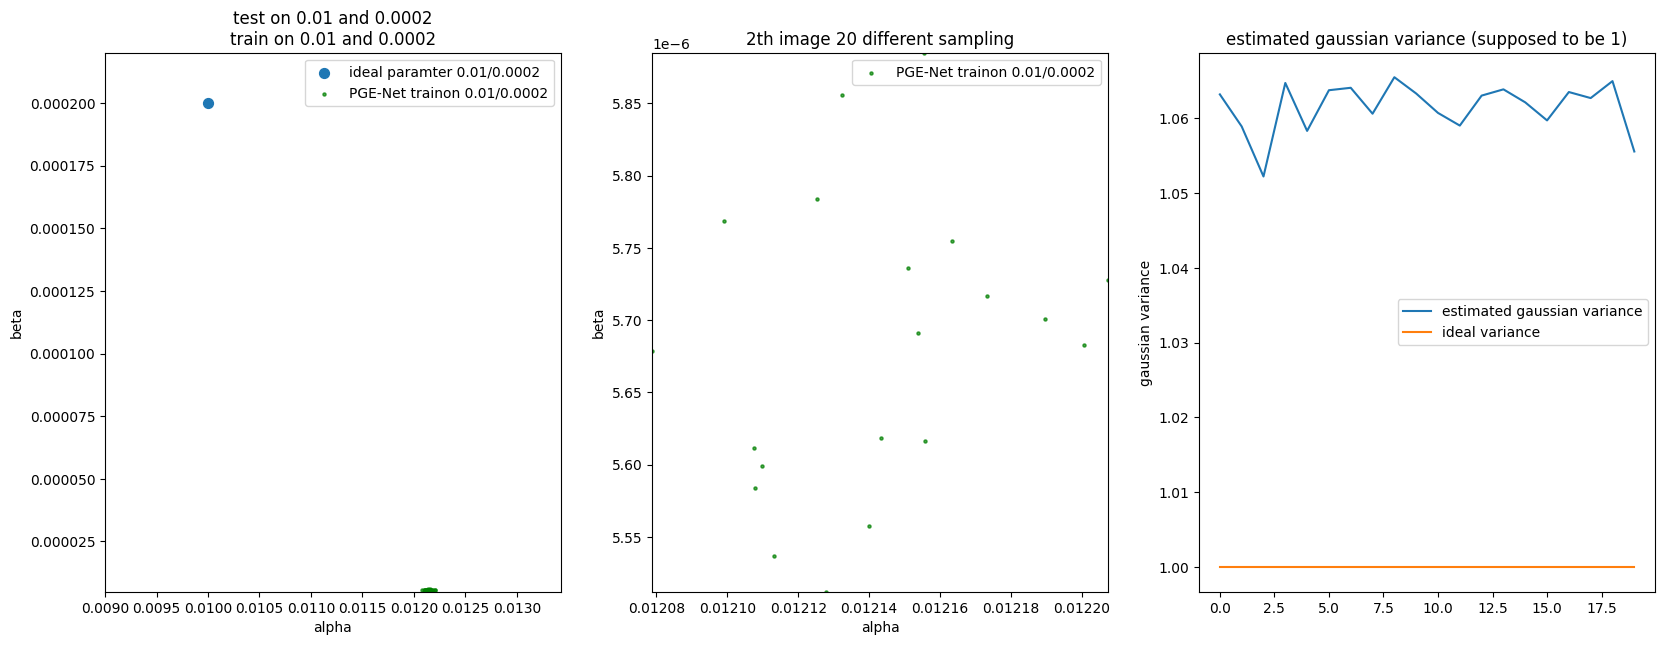

../output_parameter/230119_PGE_Net_RawRGB_trainon_random_noise_teston_alpha_0.01_beta_0.0002_20sampling20images_alpha_sigma_estimated_gaussian.txt
../output_parameter/230119_PGE_Net_RawRGB_trainon_random_noise_teston_alpha_0.01_beta_0.02_20sampling20images_alpha_sigma_estimated_gaussian.txt
../output_parameter/230119_PGE_Net_RawRGB_trainon_alpha_0.01_beta_0.02_teston_alpha_0.01_beta_0.02_20sampling20images_alpha_sigma_estimated_gaussian.txt
400


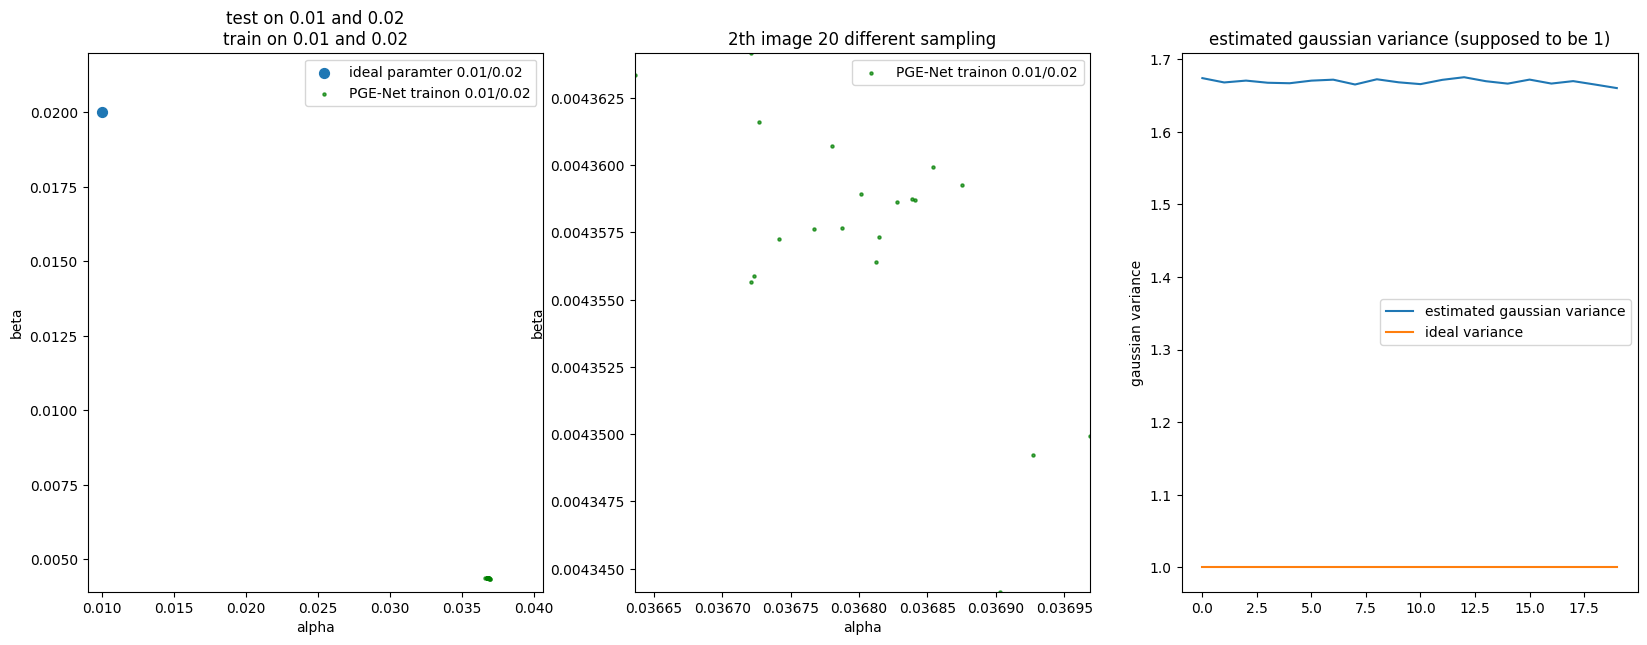

../output_parameter/230119_PGE_Net_RawRGB_trainon_random_noise_teston_alpha_0.05_beta_0.02_20sampling20images_alpha_sigma_estimated_gaussian.txt
../output_parameter/230119_PGE_Net_RawRGB_trainon_alpha_0.05_beta_0.02_teston_alpha_0.05_beta_0.02_20sampling20images_alpha_sigma_estimated_gaussian.txt
400


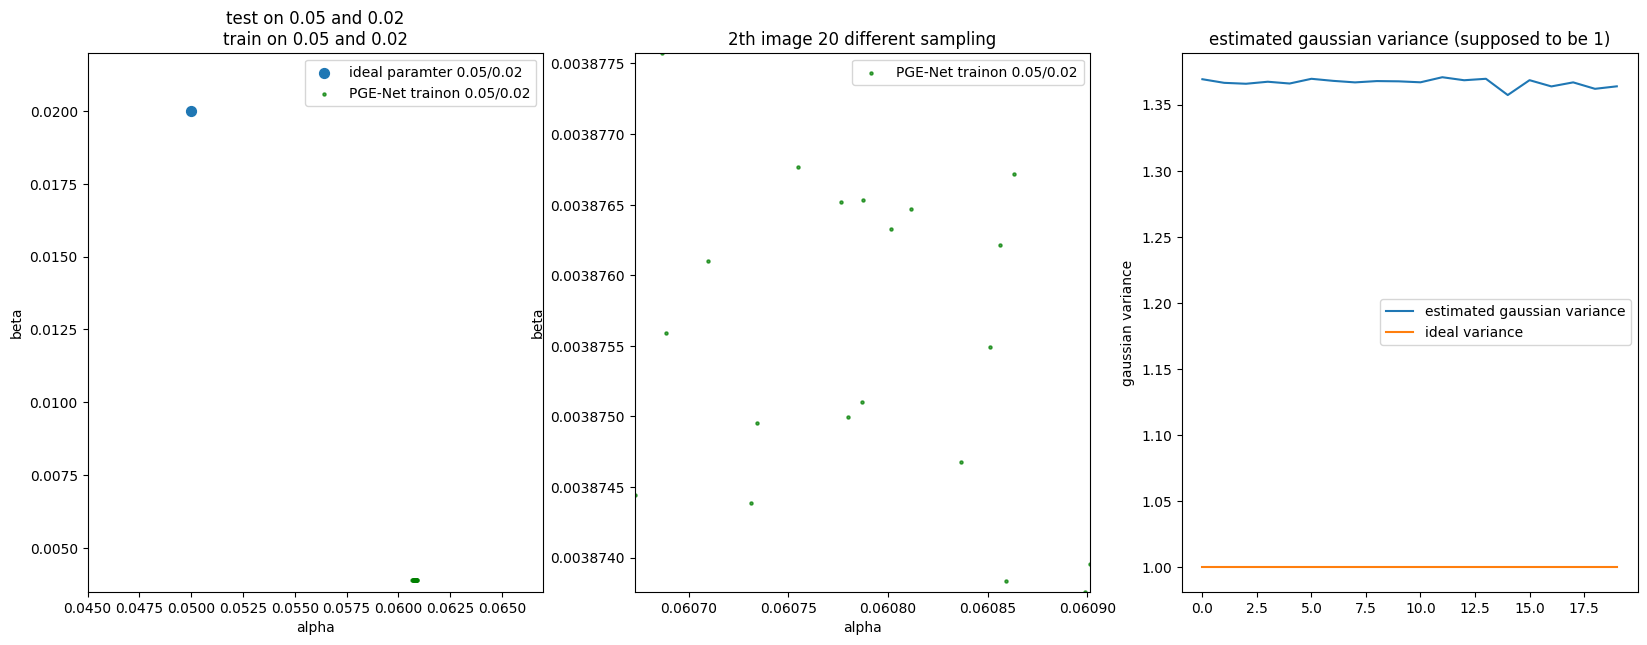

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


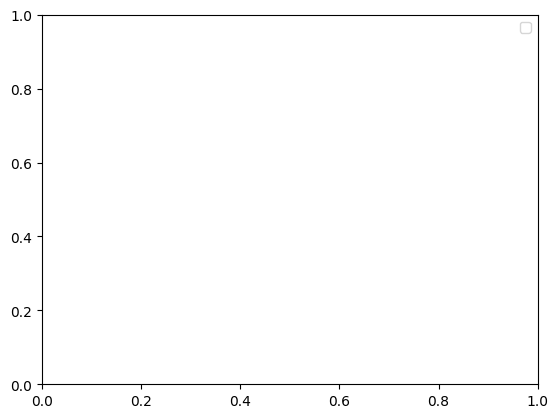

In [95]:
target_idx = 40
# color_list = ['green','red','orange','blue']
color_list = ['green','blue','orange']
x_max,y_max = 0,0
for filename in sorted(glob("../output_parameter/230119*.txt"),key=lambda x : x.split('_teston_')[1]):
    print(filename)
    parameter = filename.split("trainon_")[1]
    # print(parameter)
    trainon_parameter = parameter.split('_teston')[0]
    if trainon_parameter[:6] != 'random':
        trainon_alpha,trainon_beta = float(trainon_parameter.split("_")[1]),float(trainon_parameter.split("_")[3])
    teston_parameter = parameter.split('_teston_')[1].split('_alpha_sigma')[0]
    if teston_parameter[:6] != 'random':
        teston_alpha,teston_beta = float(teston_parameter.split("_")[1]),float(teston_parameter.split("_")[3])
    if trainon_parameter[:6] != 'random' and teston_parameter[:6] != 'random':
        if teston_alpha != trainon_alpha or teston_beta != trainon_beta :
            continue
    else :
        continue
    output = np.loadtxt(filename)
    alpha_arr, beta_arr, estimated_gaussian_arr = output[:,0],output[:,1],output[:,2]
    # print(idx,trainon_parameter)
    print(len(alpha_arr))
    for idx in range(0,len(alpha_arr),20):
        if target_idx != idx :
            continue
        start,end = idx , (idx+20)
        alpha, beta, estimated_gaussian = alpha_arr[start:end], beta_arr[start:end], estimated_gaussian_arr[start:end]

        x_max,y_max = max(max(alpha),teston_alpha), max(max(beta),teston_beta)
        x_min,y_min = min(min(alpha),teston_alpha), min(min(beta),teston_beta)
        x_max,y_max = x_max*1.1,y_max*1.1
        x_min,y_min = x_min*0.9,y_min*0.9
        label_str = f"{trainon_alpha}/{trainon_beta}"
        if trainon_parameter[:6] == 'random':
            label_str='random'
        plt.figure(figsize=(20,7))
        plt.subplot(131)
        plt.title(f"test on {teston_alpha} and {teston_beta}\ntrain on {trainon_alpha} and {trainon_beta}")
        plt.scatter(teston_alpha,teston_beta, #c=color_list[idx%3],
                label=f'ideal paramter {teston_alpha}/{teston_beta}',
               s=50)
        plt.scatter(alpha,beta,c=color_list[idx%4], label=f'PGE-Net trainon {label_str}',#teston_parameter,
                   alpha=0.7,s=5)

        plt.xlim(x_min,(x_max))
        plt.ylim(y_min,(y_max))
        plt.xlabel('alpha')
        plt.ylabel('beta')
        plt.legend()

        plt.subplot(132)
        plt.title(f"{idx//20}th image 20 different sampling")
        plt.scatter(alpha,beta,c=color_list[idx%4], label=f'PGE-Net trainon {label_str}',#teston_parameter,
                   alpha=0.7,s=5)
        plt.xlim(min(alpha),max(alpha))
        plt.ylim(min(beta),max(beta))
        plt.xlabel('alpha')
        plt.ylabel('beta')
        plt.legend()

        plt.subplot(133)
        plt.title("estimated gaussian variance (supposed to be 1)")
        plt.plot(estimated_gaussian, label = 'estimated gaussian variance')
        plt.plot([1]*len(estimated_gaussian), label = 'ideal variance')
        plt.ylabel('gaussian variance')
        plt.legend()
        plt.pause(0.01) 
        x_max,y_max = 0,0
        # idx+=1
        break
plt.legend()

In [26]:
a = np.linspace(0,10,11)
print(a)
mask = range(1,11,4)
a[mask]

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


array([1., 5., 9.])

## different image, same sampling

../output_parameter/230119_PGE_Net_RawRGB_trainon_alpha_0.01_beta_0.0002_teston_alpha_0.01_beta_0.0002_20sampling20images_alpha_sigma_estimated_gaussian.txt
400
idx : 0


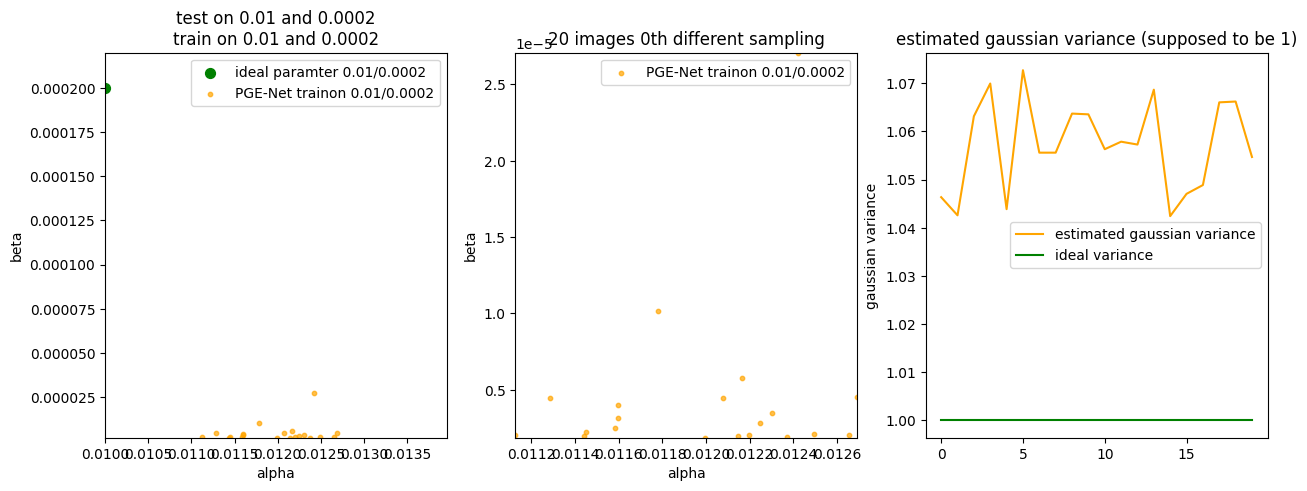

../output_parameter/230119_PGE_Net_RawRGB_trainon_random_noise_teston_alpha_0.01_beta_0.0002_20sampling20images_alpha_sigma_estimated_gaussian.txt
../output_parameter/230119_PGE_Net_RawRGB_trainon_random_noise_teston_alpha_0.01_beta_0.02_20sampling20images_alpha_sigma_estimated_gaussian.txt
../output_parameter/230119_PGE_Net_RawRGB_trainon_alpha_0.01_beta_0.02_teston_alpha_0.01_beta_0.02_20sampling20images_alpha_sigma_estimated_gaussian.txt
400
idx : 0


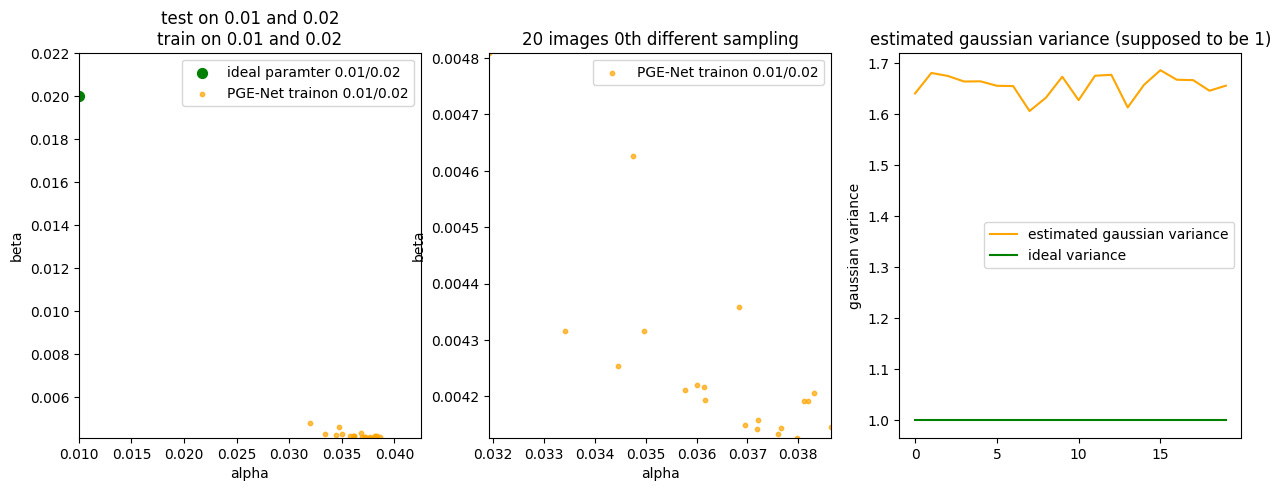

../output_parameter/230119_PGE_Net_RawRGB_trainon_random_noise_teston_alpha_0.05_beta_0.02_20sampling20images_alpha_sigma_estimated_gaussian.txt
../output_parameter/230119_PGE_Net_RawRGB_trainon_alpha_0.05_beta_0.02_teston_alpha_0.05_beta_0.02_20sampling20images_alpha_sigma_estimated_gaussian.txt
400
idx : 0


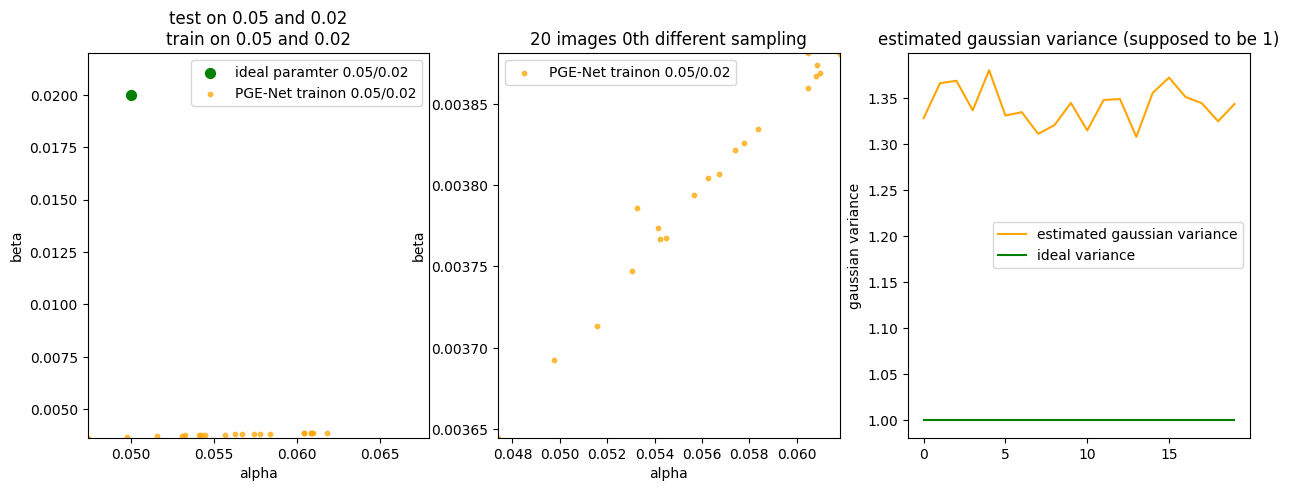

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


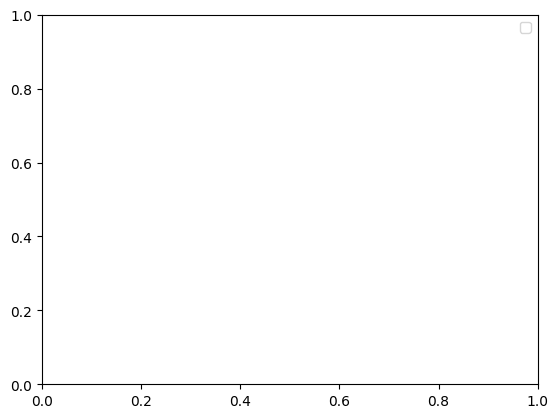

In [51]:
target_idx = 0
# color_list = ['green','red','orange','blue']
color_list = ['green','orange','blue']
x_max,y_max = 0,0
for filename in sorted(glob("../output_parameter/230119*.txt"),key=lambda x : x.split('_teston_')[1]):
    print(filename)
    parameter = filename.split("trainon_")[1]
    # print(parameter)
    trainon_parameter = parameter.split('_teston')[0]
    if trainon_parameter[:6] != 'random':
        trainon_alpha,trainon_beta = float(trainon_parameter.split("_")[1]),float(trainon_parameter.split("_")[3])
    teston_parameter = parameter.split('_teston_')[1].split('_alpha_sigma')[0]
    if teston_parameter[:6] != 'random':
        teston_alpha,teston_beta = float(teston_parameter.split("_")[1]),float(teston_parameter.split("_")[3])
    if trainon_parameter[:6] != 'random' and teston_parameter[:6] != 'random':
        if teston_alpha != trainon_alpha or teston_beta != trainon_beta :
            continue
    else :
        continue
    output = np.loadtxt(filename)
    alpha_arr, beta_arr, estimated_gaussian_arr = output[:,0],output[:,1],output[:,2]
    # print(idx,trainon_parameter)
    print(len(alpha_arr))
    for idx in range(0,20):
        if target_idx != idx :
            continue
        print(f"idx : {idx}")
        mask = range(idx,len(alpha_arr),20)
        alpha, beta, estimated_gaussian = alpha_arr[mask], beta_arr[mask], estimated_gaussian_arr[mask]

        x_max,y_max = max(max(alpha),teston_alpha), max(max(beta),teston_beta)
        x_min,y_min = min(min(alpha),teston_alpha), min(min(beta),teston_beta)
        x_max,y_max = x_max*1.1,y_max*1.1     
        label_str = f"{trainon_alpha}/{trainon_beta}"
        if trainon_parameter[:6] == 'random':
            label_str='random'
        plt.figure(figsize=(15,5))
        plt.subplot(131)
        plt.title(f"test on {teston_alpha} and {teston_beta}\ntrain on {trainon_alpha} and {trainon_beta}")
        plt.scatter(teston_alpha,teston_beta, c=color_list[0],
                label=f'ideal paramter {teston_alpha}/{teston_beta}',
               s=50)
        plt.scatter(alpha,beta,c=color_list[1], label=f'PGE-Net trainon {label_str}',#teston_parameter,
                   alpha=0.7,s=10)

        plt.xlim(x_min,(x_max))
        plt.ylim(y_min,(y_max))
        plt.xlabel('alpha')
        plt.ylabel('beta')
        plt.legend()

        plt.subplot(132)
        plt.title(f"20 images {idx}th different sampling")
        plt.scatter(alpha,beta,c=color_list[1], label=f'PGE-Net trainon {label_str}',#teston_parameter,
                   alpha=0.7,s=10)
        plt.xlim(min(alpha),max(alpha))
        plt.ylim(min(beta),max(beta))
        plt.xlabel('alpha')
        plt.ylabel('beta')
        plt.legend()

        plt.subplot(133)
        plt.title("estimated gaussian variance (supposed to be 1)")
        plt.plot(estimated_gaussian, label = 'estimated gaussian variance', c=color_list[1])
        plt.plot([1]*len(estimated_gaussian), label = 'ideal variance',c=color_list[0])
        plt.ylabel('gaussian variance')
        plt.legend()
        plt.pause(0.01) 
        x_max,y_max = 0,0
        # idx+=1
        break
plt.legend()

In [35]:
import h5py
f = h5py.File('../test_fivek_rawRGB_alpha_0.01_beta_0.0002_20sampling20images.hdf5','r')
f.keys()

<KeysViewHDF5 ['clean_images', 'noisy_images']>

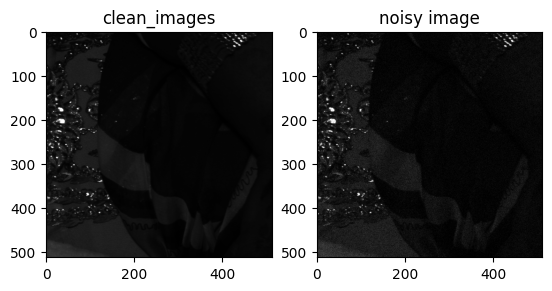

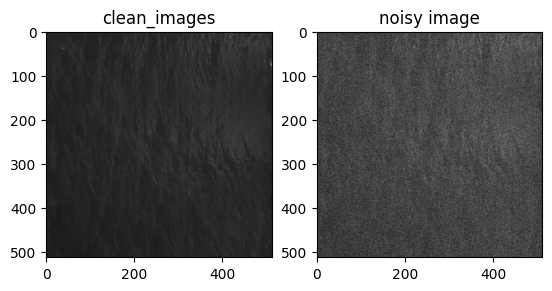

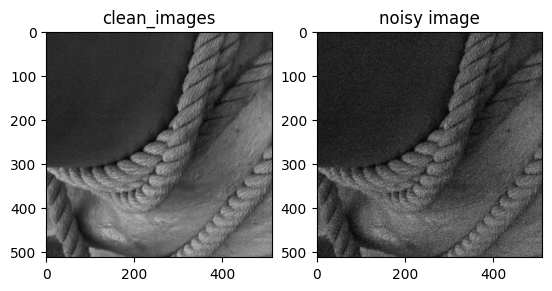

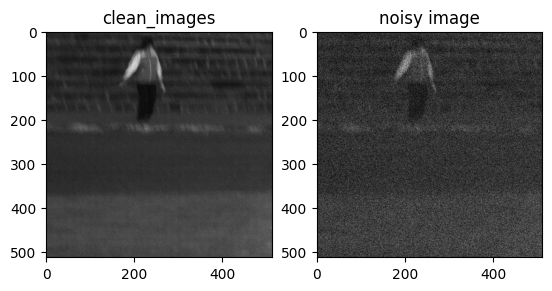

In [47]:
for idx in range(0,4):
    plt.subplot(121)
    plt.title('clean_images')
    plt.imshow(f['clean_images'][idx*20],cmap='gray')
    plt.subplot(122)
    plt.title('noisy image')
    plt.imshow(f['noisy_images'][idx*20],cmap='gray')
    plt.pause(0.01)

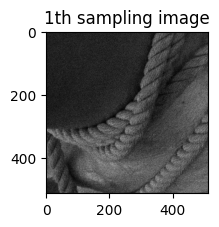

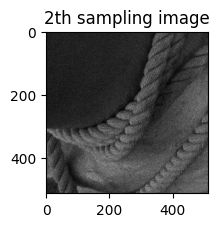

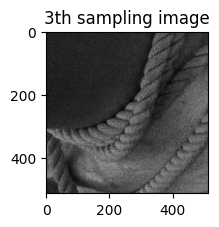

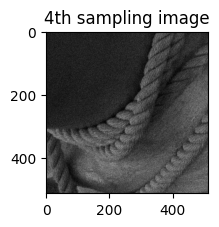

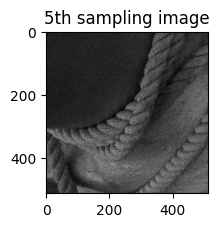

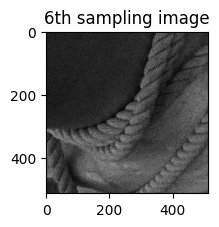

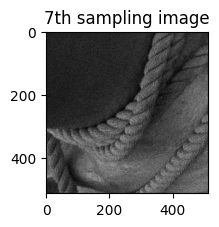

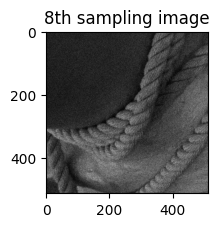

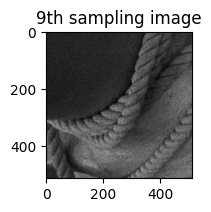

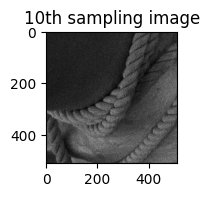

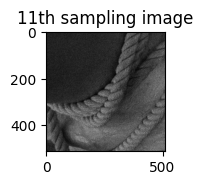

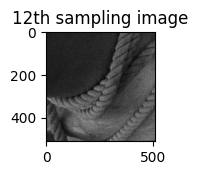

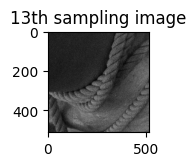

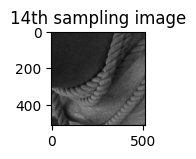

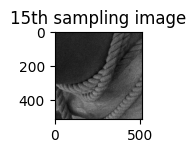

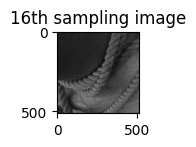

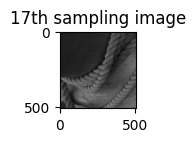

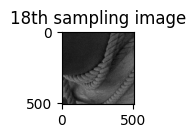

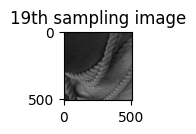

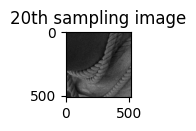

In [91]:


for i in range(20):
    plt.figure(figsize=(20,50))
    plt.subplot(20,i+1,1)
    plt.title(f"{i+1}th sampling image")
    plt.imshow(f['noisy_images'][40+i],cmap='gray')
# plt.pause(0.01)